# Individual Project - Open data source 
Théau BRUNO 

# HOUSING PRICE

Region: Western Europe

    - Belgium
    - France 
    - Germany 
    - Netherlands 
    - Switzerland

Objective: Build a linear regression model to explain the relationship between the housing price and the factors.

In [1]:
import numpy as np              
import pandas as pd              
import matplotlib.pyplot as plt 
import math  

In [2]:
# Import the csv file coming from the OECD data
unemployment = pd.read_csv('./data/unemployment.csv')
# Delete all the columns we don't need
unemployment = unemployment.drop(['Flags', 'Flag Codes','Unit', 'Reference Period Code', 'Reference Period','MEASURE','SUBJECT', 'FREQUENCY', 'Frequency', 'Measure', 'LOCATION', 'PowerCode', 'PowerCode Code', 'Unit Code', 'TIME' ], axis = 1)
# Converting the Time column to intger to permit the good merge 
unemployment = unemployment.astype({"Time": 'int64' })
# Change the column name to have the same name on each table
unemployment = unemployment.rename(columns={'Subject':'Variable'})
# Change column name 
unemployment = unemployment.rename(columns={'Value':'Unemployment rate'})
# Remove the variable description 
unemployment = unemployment.drop(['Variable'], axis = 1)
unemployment.head()

,Country,Time,Unemployment rate
0,Belgium,2005,8.433333
1,Belgium,2006,8.250000
2,Belgium,2007,7.483333
3,Belgium,2008,6.975000
4,Belgium,2009,7.891667


In [3]:
# Import the csv file coming from the OECD data
house = pd.read_csv('./data/house_pricing.csv')
# Delete all the columns we don't need
house = house.drop(['Flags', 'Flag Codes','Unit', 'Reference Period Code', 'Reference Period', 'PowerCode', 'PowerCode Code', 'Unit Code', 'TIME', 'IND', 'COU'], axis = 1)
# Keep only the total time
house = house[~house.Time.str.contains('Q')]
# Converting the Time column to intger to permit the good merge
house = house.astype({"Time": 'int64' })
house = house.rename(columns={'Indicator':'Variable'})
# Create a Pivot table, to have a column for each variable instead of a row
house = house.pivot_table('Value', ['Country', 'Time'], 'Variable')
# Convert the pivot table to a flat dataframe, easier to merge 
house = pd.DataFrame(house.to_records())
# Remove missing value 
#house = house.dropna(0)
house.head()

,Country,Time,"Nominal house price indices, s.a.",Price to income ratio,Price to rent ratio,"Real house price indices, s.a.","Rent prices, s.a.",Standardised price-income ratio,Standardised price-rent ratio
0,Belgium,2005,72.53625,87.898689,86.477540,85.966501,83.868974,115.664738,117.708131
1,Belgium,2006,79.61525,92.111319,91.723173,91.823655,86.793144,121.208082,124.848178
2,Belgium,2007,85.81875,95.058154,96.982385,96.400982,88.486539,125.085784,132.006707
3,Belgium,2008,89.60525,94.978549,99.309619,97.562672,90.229242,124.981032,135.174401
4,Belgium,2009,89.18300,95.147864,96.828823,97.904371,92.106929,125.203832,131.797688


In [4]:
#house['Variable'].unique()

In [5]:
countries = house['Country'].unique()
countries

array(['Belgium', 'Euro area (17 countries)', 'France', 'Germany',
       'Netherlands', 'Switzerland'], dtype=object)

In [6]:
house.head()

,Country,Time,"Nominal house price indices, s.a.",Price to income ratio,Price to rent ratio,"Real house price indices, s.a.","Rent prices, s.a.",Standardised price-income ratio,Standardised price-rent ratio
0,Belgium,2005,72.53625,87.898689,86.477540,85.966501,83.868974,115.664738,117.708131
1,Belgium,2006,79.61525,92.111319,91.723173,91.823655,86.793144,121.208082,124.848178
2,Belgium,2007,85.81875,95.058154,96.982385,96.400982,88.486539,125.085784,132.006707
3,Belgium,2008,89.60525,94.978549,99.309619,97.562672,90.229242,124.981032,135.174401
4,Belgium,2009,89.18300,95.147864,96.828823,97.904371,92.106929,125.203832,131.797688


In [7]:
house_france = house[house.Country == 'France']

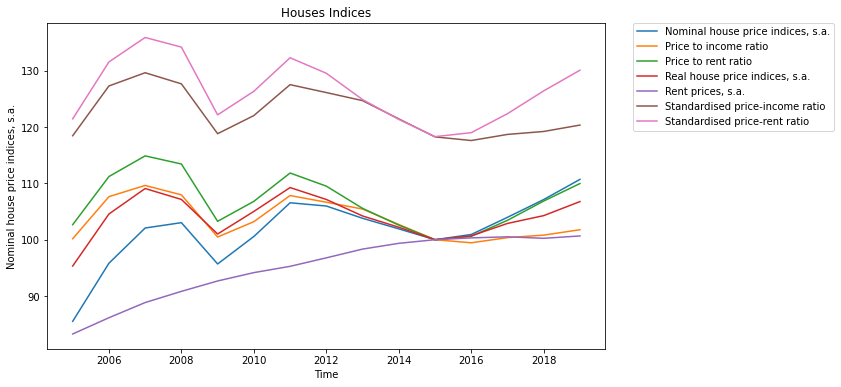

In [8]:
# Plot of the houses indices with sns using a loop

fig, ax = plt.subplots(figsize=(10,6))
import seaborn as sns

Variables = ['Nominal house price indices, s.a.', 'Price to income ratio', 'Price to rent ratio', 'Real house price indices, s.a.','Rent prices, s.a.','Standardised price-income ratio','Standardised price-rent ratio']
for i in Variables: 
    sns.lineplot(x = house_france['Time'], y= house_france[str(i)], label = i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Houses Indices')
    plt.xlabel("Time")
    

## Example of House Indices for a Country

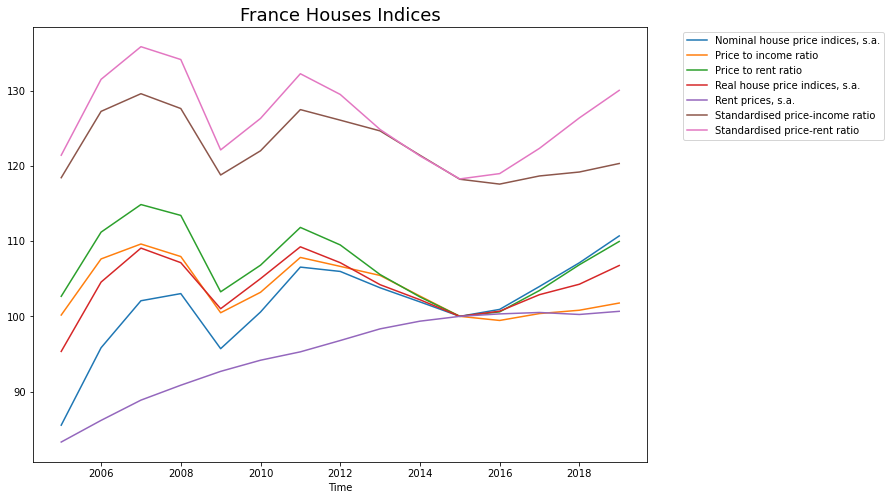

In [9]:
fig, ax = plt.subplots(figsize=(11,8))
for i in Variables: 
    plt.plot(house_france['Time'], house_france[str(i)], label =i )
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('France Houses Indices', fontsize=18)
    plt.xlabel("Time")
    

In [10]:
house_France = house[house.Country == 'France']
house_Belgium = house[house.Country == 'Belgium']
house_Germany = house[house.Country == 'Germany']
house_Netherlands = house[house.Country == 'Netherlands']
house_Switzerland = house[house.Country == 'Switzerland']

In [11]:
LABELS = ["France", "Belgium", "Germany", "Netherlands", "Switzerland"]

for l in LABELS: 
   print('test_'+str(l))

test_France
test_Belgium
test_Germany
test_Netherlands
test_Switzerland


In [12]:
#Unsucessfull tentative to create an interactive bokeh  

from bokeh.io import curdoc
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, Select 
from bokeh.plotting import figure

from bokeh.plotting import figure, output_file, show
from bokeh.layouts import column, row


from bokeh.io import show
from bokeh.models import CustomJS, RadioGroup

LABELS = ["France", "Belgium", "Germany", "Netherlands", "Switzerland"]

#radio_group = RadioGroup(labels=LABELS, active=0)
#radio_group.js_on_click(CustomJS(code="""
#    console.log('radio_group: active=' + this.active, this.toString())
#"""))

def test(x):
    if x == 'France':
        p.line(x, house_France['Real house price indices, s.a.'], legend_label='Real house price indices, s.a.', line_width=2, line_color = 'green')
        p.line(x, house_France['Rent prices, s.a.'], legend_label='Rent prices, s.a.', line_width=2, line_color = 'blue')
    elif x == Belgium:
        p.line(x, house_France['Real house price indices, s.a.'], legend_label='Real house price indices, s.a.', line_width=2, line_color = 'green')
        p.line(x, house_France['Rent prices, s.a.'], legend_label='Rent prices, s.a.', line_width=2, line_color = 'blue')
    elif x == Germany:
        p.line(x, house_Germany['Real house price indices, s.a.'], legend_label='Real house price indices, s.a.', line_width=2, line_color = 'green')
        p.line(x, house_Germany['Rent prices, s.a.'], legend_label='Rent prices, s.a.', line_width=2, line_color = 'blue')    
        
        
        
#y = house_france['Real house price indices, s.a.']

radio_group = RadioGroup(labels=LABELS, active=0)
radio_group.on_click(test)


x = house_france['Time']
#y = house_france[ 'Real house price indices, s.a.']
#house_france['Rent prices, s.a.']


# create a new plot with a title and axis labels
#p = figure(title="Houses Indices", x_axis_label='Time', y_axis_label='Indices', plot_width=500, plot_height=400)
p = figure(x_axis_label='Time', y_axis_label='Indices', plot_width=500, plot_height=400)

# add a line renderer with legend and line thickness
#p.line(x, y, legend_label='Real house price indices, s.a.', line_width=2, line_color = 'green')
#p.line(x, house_france['Rent prices, s.a.'], legend_label='Rent prices, s.a.', line_width=2, line_color = 'blue')


# show the results
show(row(column(radio_group, width=100), p))
#show(p)



You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



In [13]:
#Method to plot using pivot table
#house_france.pivot_table('Value', index='Time', columns='Indicator').plot()

In [14]:
# Cleaning of the column we don't need 
# Focus on Real house price indices, s.a. and Rent prices, s.a.
house = house.drop(['Nominal house price indices, s.a.','Price to income ratio', 'Price to rent ratio','Standardised price-income ratio','Standardised price-rent ratio'], axis =1)

In [15]:
house.head()

,Country,Time,"Real house price indices, s.a.","Rent prices, s.a."
0,Belgium,2005,85.966501,83.868974
1,Belgium,2006,91.823655,86.793144
2,Belgium,2007,96.400982,88.486539
3,Belgium,2008,97.562672,90.229242
4,Belgium,2009,97.904371,92.106929


## Real house price indice

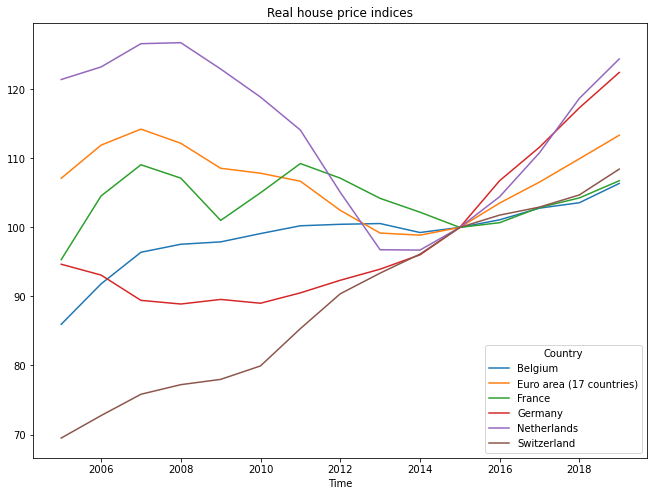

In [16]:
house.pivot_table('Real house price indices, s.a.', index='Time', columns='Country').plot(title='Real house price indices', figsize=(11, 8));

## Rent Price plot 

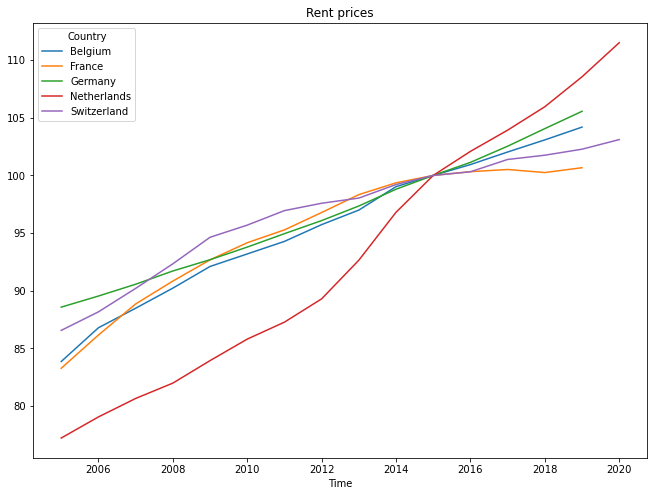

In [17]:
# house_rent_price = house[house.Indicator == 'Rent prices, s.a.']
house.pivot_table('Rent prices, s.a.', index='Time', columns='Country').plot(title='Rent prices', figsize=(11, 8));

In [18]:
demography = pd.read_csv('./data/demography1.csv')
demography = demography.drop(['Flags', 'Flag Codes', 'TIME', 'LOCATION', 'SEX', 'AGE'], axis = 1)
demography = demography.drop(['Sex', 'Age'], axis = 1)
demography = demography.rename(columns={"Value": "Demography"})
demography.Time.unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])

<AxesSubplot:xlabel='Time'>

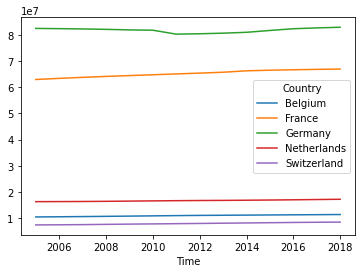

In [19]:
demography.pivot_table('Demography', index='Time', columns='Country').plot()

In [20]:
house_price_index = pd.read_csv('./data/house_price_index.csv')
house_price_index = house_price_index.drop(['Flags', 'Flag Codes', 'TIME', 'Frequency', 'FREQ', 'MEASURE', 'Measure', 'Dwellings', 'DWELLINGS', 'Vintage', 'VINTAGE', 'VAR', 'TL', 'Territory Level and Typology', 'REG_ID'] , axis = 1)
#house_price_index = house_price_index[~house_price_index.Country.str.contains('European UNion')]
#house_price_index.tail(15)

<AxesSubplot:xlabel='Time'>

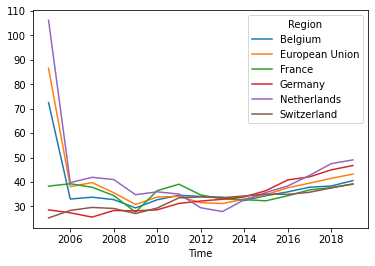

In [21]:
house_price_index.pivot_table('Value', index='Time', columns='Region').plot()

# Problem with the year 2005, we won't use this data 

In [22]:
# Data preparation and cleaning for the economic indices similar to house

economy = pd.read_csv('./data/economy.csv')
economy = economy.drop(['Flags', 'Flag Codes','VARIABLE', 'TIME', 'Unit Code', 'Frequency', 'FREQUENCY', 'Edition', 'EDITION', 'LOCATION', 'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code', 'Reference Period'] , axis = 1)
economy = economy.pivot_table('Value', ['Country', 'Time'], 'Variable')
economy = pd.DataFrame(economy.to_records())
economy = economy.dropna(axis = 1)
economy = economy[~economy.Country.str.contains('Euro area (17 countries)')]
economy = economy[~economy.Country.str.contains('World')]
economy.Country.unique()

/Users/theaubruno/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


array(['Belgium', 'Euro area (17 countries)', 'France', 'Germany',
       'Netherlands', 'Switzerland'], dtype=object)

In [23]:
# Data preparation and cleaning for the economic indices similar to house

indice_eco = pd.read_csv('./data/indice_eco.csv')
indice_eco = indice_eco.rename(columns={'Subject':'Variable'})
indice_eco = indice_eco.astype({"Time": object})
indice_eco = indice_eco.drop(['Flags', 'Flag Codes', 'TIME', 'Frequency', 'FREQUENCY', 'SUBJECT', 'MEASURE', 'Measure', 'LOCATION', 'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code', 'Reference Period', 'Unit Code'] , axis = 1)
indice_eco = indice_eco.pivot_table('Value', ['Country', 'Time'], 'Variable')
indice_eco = pd.DataFrame(indice_eco.to_records())
indice_eco.Country.unique()

array(['Belgium', 'France', 'Germany', 'Netherlands', 'Switzerland'],
      dtype=object)

In [24]:
# Data preparation and cleaning for the economic indices similar to house

interest_rate = pd.read_csv('./data/interest_rate.csv')
interest_rate = interest_rate.drop(['Flags', 'Flag Codes', 'TIME', 'Frequency', 'FREQUENCY', 'SUBJECT', 'LOCATION', 'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code', 'Reference Period', 'Unit Code'] , axis = 1)
interest_rate = interest_rate.rename(columns={"Subject": "Variable"})
interest_rate = interest_rate.pivot_table('Value', ['Country', 'Time'], 'Variable')
interest_rate = interest_rate.dropna(1)
interest_rate = pd.DataFrame(interest_rate.to_records())
interest_rate.head()

,Country,Time,"Long-term interest rates, Per cent per annum","Short-term interest rates, Per cent per annum"
0,Belgium,2005,3.428333,2.184675
1,Belgium,2006,3.815000,3.079225
2,Belgium,2007,4.328333,4.277608
3,Belgium,2008,4.417500,4.634233
4,Belgium,2009,3.901667,1.228358


In [25]:
# Recap of the shape of dataframe before to merge 
print(interest_rate.shape)
print(indice_eco.shape)
print(house.shape)
print(demography.shape)
print(economy.shape)
print(unemployment.shape)

(75, 4)
(75, 14)
(92, 4)
(70, 3)
(102, 7)
(70, 3)


## Features:
    - Economy 
    - Demography 
    - Finance 
    
## Target: 
    - House indices

Open Source website used : oecd.org

In [30]:
print('23 FEATURES:')
print('')
for c in columns:
    print(c)

23 FEATURES:

Country
Time
Construction, s.a.
Exchange rates,  monthly averages, National currency per US dollar
Exports in goods, s.a.
GDP Exports; constant prices, s.a.
GDP Government consumption expenditure; constant prices, s.a.
GDP Gross fixed capital formation; constant prices, s.a.
GDP Imports of goods and services; constant prices, s.a.
GDP Private final consumption expenditure; constant prices, s.a.
Gross domestic product; constant prices, s.a.
Imports in goods, s.a.
Long-term interest rate
Total employment: all persons, s.a.
Demography
Long-term interest rates, Per cent per annum
Short-term interest rates, Per cent per annum
Exports of goods and services, volume in USD (national accounts basis)
Goods and services trade, volume in USD
Gross domestic product, volume, growth
Gross domestic product, volume, market prices
Imports of goods and services, volume in USD (national accounts basis)
Real house price indices, s.a.
Rent prices, s.a.


# Real Price Predicted

In [27]:
# inner method to don't have missing value 

database = pd.merge(indice_eco, demography,  how='inner', on=['Country','Time'])
database = pd.merge(database, interest_rate,  how='inner', on=['Country','Time'])
database = pd.merge(database, economy, how='inner', on =['Country', 'Time'])
database = pd.merge(database, house,  how='inner', on=['Country','Time'])


In [28]:
print(database.shape)
print(database.info())

(70, 24)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 24 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Country                                                                 70 non-null     object 
 1   Time                                                                    70 non-null     int64  
 2   Construction, s.a.                                                      70 non-null     float64
 3   Exchange rates,  monthly averages, National currency per US dollar      70 non-null     float64
 4   Exports in goods, s.a.                                                  70 non-null     float64
 5   GDP Exports; constant prices, s.a.                                      70 non-null     float64
 6   GDP Government consumption expenditure; constant prices, s.a.           70 

In [29]:
# Preparation of the X and the y 
columns = database.columns
columns
#params = columns.drop(['Time', 'Real Price Predicted', 'Rent prices, s.a.'])
params = columns[2:-2]
params

Index(['Construction, s.a.',
       'Exchange rates,  monthly averages, National currency per US dollar',
       'Exports in goods, s.a.', 'GDP Exports; constant prices, s.a.',
       'GDP Government consumption expenditure; constant prices, s.a.',
       'GDP Gross fixed capital formation; constant prices, s.a.',
       'GDP Imports of goods and services; constant prices, s.a.',
       'GDP Private final consumption expenditure; constant prices, s.a.',
       'Gross domestic product; constant prices, s.a.',
       'Imports in goods, s.a.', 'Long-term interest rate',
       'Total employment: all persons, s.a.', 'Demography',
       'Long-term interest rates, Per cent per annum',
       'Short-term interest rates, Per cent per annum',
       'Exports of goods and services, volume in USD (national accounts basis)',
       'Goods and services trade, volume in USD',
       'Gross domestic product, volume, growth',
       'Gross domestic product, volume, market prices',
       'Imports of 

In [31]:
# Linear Regression 
from sklearn.linear_model import LinearRegression
params = columns[2:-2]

X = database[params]
y = database['Real house price indices, s.a.']

model = LinearRegression()
model.fit(X,y)
database['Real Price Predicted'] = model.predict(X)

In [32]:
Score_Linear_Regression = round(model.score(X, y),3)*100

In [33]:
print( "Linear Regression Score :", Score_Linear_Regression, "%")

Linear Regression Score : 73.9 %


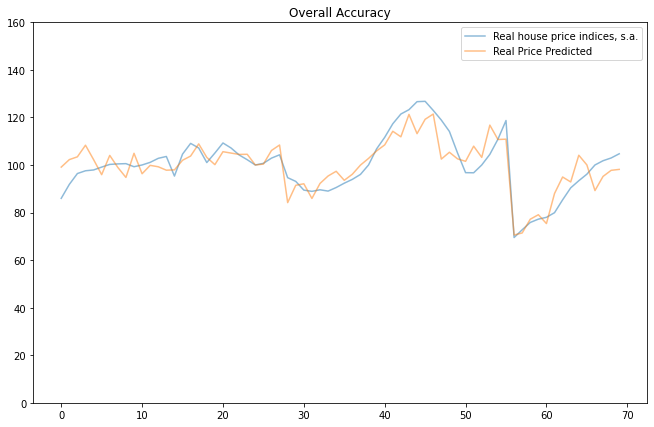

In [34]:
#database[['Real house price indices, s.a.', 'Real Price Predicted']].groupby(database['Country']).plot(alpha=0.5, figsize=(11,7), title = "Accuracy")

#Non coventional use of plot but to better visualize the accuracy. 
# Keep together all the country 
database[['Real house price indices, s.a.', 'Real Price Predicted']].plot(alpha=0.5, figsize=(11,7), title = "Overall Accuracy", ylim= (0,160));

In [35]:
model_variables = pd.Series(model.coef_, index = X.columns)
model_variables

Construction, s.a.                                                        9.238928e-01
Exchange rates,  monthly averages, National currency per US dollar       -7.809718e+01
Exports in goods, s.a.                                                   -2.904593e-01
GDP Exports; constant prices, s.a.                                        9.380915e-01
GDP Government consumption expenditure; constant prices, s.a.             7.575991e-01
GDP Gross fixed capital formation; constant prices, s.a.                 -1.185786e-01
GDP Imports of goods and services; constant prices, s.a.                 -6.134945e-01
GDP Private final consumption expenditure; constant prices, s.a.         -3.636939e+00
Gross domestic product; constant prices, s.a.                            -4.494963e+00
Imports in goods, s.a.                                                    9.694290e-02
Long-term interest rate                                                  -1.058751e+00
Total employment: all persons, s.a.        

In [36]:
# Other method using statsmodel to get the significant impact of each features (p_value)

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
model2 = est.fit()
print(model2.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Real house price indices, s.a.   R-squared:                       0.738
Model:                                        OLS   Adj. R-squared:                  0.646
Method:                             Least Squares   F-statistic:                     7.987
Date:                            Tue, 05 Jan 2021   Prob (F-statistic):           2.27e-09
Time:                                    16:49:56   Log-Likelihood:                -226.18
No. Observations:                              70   AIC:                             490.4
Df Residuals:                                  51   BIC:                             533.1
Df Model:                                      18                                         
Covariance Type:                        nonrobust                                         
                                                                             coef    std e

In [37]:
# Trying to see if the ridge methode can improve the linear model 
from sklearn.linear_model import Ridge
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) 
ridge = Ridge(alpha=0.1, normalize=True) 
ridge.fit(X, y)
ridge_pred = ridge.predict(X) 
ridge.score(X, y)

0.6464180223554045

In [38]:
ridge.coef_

array([ 1.19845338e+00, -5.19314154e+01, -1.37674886e-02,  3.81987537e-01,
        1.38492077e+00, -3.81576164e-02, -3.57888449e-02, -3.16023745e+00,
       -3.98490493e-01, -3.63480677e-03, -1.16620588e+00, -9.69596846e-05,
        2.79898292e-09, -1.16620697e+00, -2.77739031e-01, -3.42885439e-13,
        1.72622854e-12,  9.01271378e-02, -1.20174181e-12,  4.59244713e-12])

In [39]:
#Lasso : small number of significant parameters and the others are close to zero 
# when only a few predictors actually influence the response)

# Trying to see if the lasso methode can improve the linear model 

from sklearn.linear_model import Lasso
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) 
lasso = Lasso(alpha=0.1, normalize=True) 
lasso.fit(X, y)
lasso_pred = lasso.predict(X) 
lasso.score(X, y)


0.5700076604806421

In [40]:
lasso.coef_

array([ 1.12457511e+00, -4.11094318e+01, -0.00000000e+00,  0.00000000e+00,
        3.49058173e-01, -0.00000000e+00,  0.00000000e+00, -2.22043500e+00,
       -0.00000000e+00, -0.00000000e+00, -1.52082228e+00, -0.00000000e+00,
       -0.00000000e+00, -2.19456251e-03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -2.49470885e-13, -0.00000000e+00])

In [41]:
database

,Country,Time,"Construction, s.a.","Exchange rates, monthly averages, National currency per US dollar","Exports in goods, s.a.","GDP Exports; constant prices, s.a.","GDP Government consumption expenditure; constant prices, s.a.","GDP Gross fixed capital formation; constant prices, s.a.","GDP Imports of goods and services; constant prices, s.a.","GDP Private final consumption expenditure; constant prices, s.a.",...,"Long-term interest rates, Per cent per annum","Short-term interest rates, Per cent per annum","Exports of goods and services, volume in USD (national accounts basis)","Goods and services trade, volume in USD","Gross domestic product, volume, growth","Gross domestic product, volume, market prices","Imports of goods and services, volume in USD (national accounts basis)","Real house price indices, s.a.","Rent prices, s.a.",Real Price Predicted
0,Belgium,2005,33.338945,0.804619,117.904172,5.511395,0.362900,5.737993,6.426879,1.443894,...,3.428333,2.184675,2.837448e+11,2.785544e+11,2.327063,3.629500e+11,2.733640e+11,85.966501,83.868974,99.105019
1,Belgium,2006,36.719902,0.796697,129.564150,5.700468,0.744712,1.907679,5.141959,1.775247,...,3.815000,3.079225,2.999169e+11,2.936664e+11,2.552693,3.722150e+11,2.874159e+11,91.823655,86.793144,102.253805
2,Belgium,2007,36.582985,0.730485,155.374066,5.435944,1.926214,7.280276,5.578809,2.092180,...,4.328333,4.277608,3.162389e+11,3.096044e+11,3.672340,3.858840e+11,3.029700e+11,96.400982,88.486539,103.434624
3,Belgium,2008,36.529361,0.683982,162.718797,1.808015,3.099646,1.906937,3.805156,1.375596,...,4.417500,4.634233,3.219642e+11,3.181284e+11,0.445471,3.876030e+11,3.142925e+11,97.562672,90.229242,108.308313
4,Belgium,2009,31.763324,0.719800,109.441161,-11.275662,1.579246,-6.622802,-10.859132,0.583748,...,3.901667,1.228358,2.856529e+11,2.830589e+11,-2.018044,3.797810e+11,2.804649e+11,97.904371,92.106929,102.267152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Switzerland,2014,36.145684,0.915047,79.192283,-6.214703,2.203230,2.554901,-7.308324,0.977728,...,0.692500,0.007833,4.125739e+11,3.708179e+11,2.482878,6.530328e+11,3.290619e+11,96.129403,99.210405,100.018242
66,Switzerland,2015,31.113836,0.962342,65.207775,4.132600,0.583072,2.078280,4.756652,2.465477,...,-0.069167,-0.783750,4.228485e+11,3.831339e+11,1.265779,6.612988e+11,3.434194e+11,100.000000,100.000000,89.237839
67,Switzerland,2016,32.700223,0.985125,72.528091,6.511148,0.351046,2.918257,5.311059,1.629927,...,-0.362000,-0.748117,4.495438e+11,4.062063e+11,1.711969,6.726200e+11,3.628689e+11,101.786000,100.316695,95.189328
68,Switzerland,2017,35.283143,0.984747,78.045858,-0.333537,0.585615,3.591128,-0.876981,1.162189,...,-0.072083,-0.731400,4.496176e+11,4.053690e+11,1.864886,6.851636e+11,3.611204e+11,102.943270,101.383872,97.744611


# Rent Price indice

In [42]:
# Same process like Real price indice but with the rent price

In [43]:
database = pd.merge(indice_eco, demography,  how='inner', on=['Country','Time'])
database = pd.merge(database, interest_rate,  how='inner', on=['Country','Time'])
database = pd.merge(database, economy, how='inner', on =['Country', 'Time'])
database = pd.merge(database, unemployment, how='inner', on =['Country', 'Time'])
database = pd.merge(database, house,  how='inner', on=['Country','Time'])

In [44]:
columns = database.columns
columns
#params = columns.drop(['Time', 'Real Price Predicted', 'Rent prices, s.a.'])
params = columns[2:-2]
params

Index(['Construction, s.a.',
       'Exchange rates,  monthly averages, National currency per US dollar',
       'Exports in goods, s.a.', 'GDP Exports; constant prices, s.a.',
       'GDP Government consumption expenditure; constant prices, s.a.',
       'GDP Gross fixed capital formation; constant prices, s.a.',
       'GDP Imports of goods and services; constant prices, s.a.',
       'GDP Private final consumption expenditure; constant prices, s.a.',
       'Gross domestic product; constant prices, s.a.',
       'Imports in goods, s.a.', 'Long-term interest rate',
       'Total employment: all persons, s.a.', 'Demography',
       'Long-term interest rates, Per cent per annum',
       'Short-term interest rates, Per cent per annum',
       'Exports of goods and services, volume in USD (national accounts basis)',
       'Goods and services trade, volume in USD',
       'Gross domestic product, volume, growth',
       'Gross domestic product, volume, market prices',
       'Imports of 

In [45]:
from sklearn.linear_model import LinearRegression
params = columns[2:-2]

X = database[params]
y = database['Rent prices, s.a.']

model = LinearRegression()
model.fit(X,y)
database['Rent prices Predicted'] = model.predict(X)

In [46]:
Score_linear_regression2 = round(model.score(X, y),3) * 100
Score_linear_regression2

88.9

In [47]:
print( "Linear Regression Score :", Score_linear_regression2, "%")

Linear Regression Score : 88.9 %


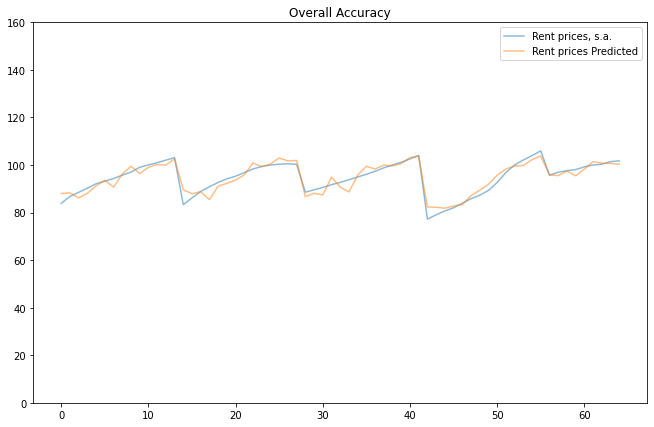

In [48]:
database[['Rent prices, s.a.', 'Rent prices Predicted']].plot(alpha=0.5, ylim= (0,160), title = "Overall Accuracy", figsize=(11,7));

## Accuracy for Netherlands

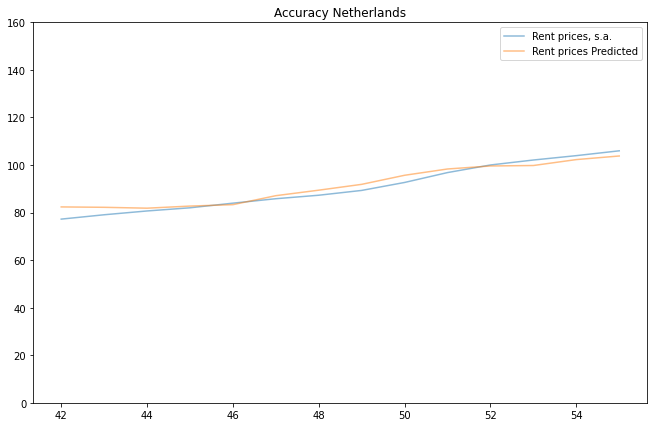

In [49]:
database[database.Country == 'Netherlands'][['Rent prices, s.a.', 'Rent prices Predicted']].plot(alpha=0.5, ylim= (0,160), title= 'Accuracy Netherlands', figsize=(11,7));

In [50]:
from sklearn.linear_model import LinearRegression
params = database.drop(['Country', 'Time','Real house price indices, s.a.', 'Rent prices, s.a.', 'Rent prices Predicted'], axis = 1).columns

X = database[params]
y = database['Rent prices, s.a.']


from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
model2 = est.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:      Rent prices, s.a.   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     17.95
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           4.67e-15
Time:                        16:49:56   Log-Likelihood:                -145.96
No. Observations:                  65   AIC:                             331.9
Df Residuals:                      45   BIC:                             375.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [55]:
features = ['constant','GDP Private final consumption expenditure','Short-term interest rates','Unemployment rate']
coefficient = ['48.5', '2.2', '-1.5', '1,5']
impact_features = { 'Features' : features,  'Coefficient': coefficient }




## Features with significant impact:

In [57]:
df = pd.DataFrame.from_dict(impact_features)
df

,Features,Coefficient
0,constant,48.5
1,GDP Private final consumption expenditure,2.2
2,Short-term interest rates,-1.5
3,Unemployment rate,"1,5"


$\hat{Rental Price}  ≃  48.5. + 2.2 * GDP - 1.5 * INT + 1.5 * U.R$

In [52]:
from sklearn.linear_model import Ridge
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) 
ridge = Ridge(alpha=0.1, normalize=True) 
ridge.fit(X, y)
ridge_pred = ridge.predict(X) 
ridge.score(X, y)

0.7981472974942205

In [53]:
from sklearn.linear_model import Lasso
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) 
lasso = Lasso(alpha=0.1, normalize=True) 
lasso.fit(X, y)
lasso_pred = lasso.predict(X) 
lasso.score(X, y)

0.6929196814587946